# Basit Doğrusal Regresyon modelleri

In [ ]:
import pandas as pd
df=pd.read_csv("c:/Users/beyra/Desktop/python_101/Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

In [ ]:
df.info()

In [ ]:
import seaborn as sns

In [ ]:
sns.jointplot(x="TV",y="Sales",data=df,kind="reg");

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X=df[["TV"]]

In [ ]:
X.head()

In [ ]:
y=df[["Sales"]]

In [ ]:
reg= LinearRegression() #model nesnesi olüştğurma

In [ ]:
model=reg.fit(X,y) # model kurma işlemi 

In [ ]:
model

In [ ]:
str(model)

In [ ]:
dir(model)

In [ ]:
model.intercept_  #beta0 değeri

In [ ]:
model.coef_ # beta1 değeri

In [ ]:
# r kare bağımlı değişkendeki değişikliğin bagımsız değişkenlerle açıklama yüzdesidir.satışlardaki değişikliğin %60i bağımsız değişkenerle açıkalnıyor
model.score(X,y)

# Basit doğrusal Regresyon Tahmin

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
g=sns.regplot(x="TV", y="Sales", data=df, ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi:Sales=7.03+TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);
# mavi çizgi model denklemi

In [ ]:
model.predict([[165]]) #tahmin et

In [ ]:
# yada şunu yapabilirsin b0+b1*Xi
model.intercept_ + model.coef_*165

In [ ]:
yeni_veri=[[5],[615],[500]]

In [ ]:
model.predict(yeni_veri)

In [ ]:
model.intercept_ + model.coef_*yeni_veri

## ARTIKLAR VE MAKİNE ÖĞRENMESİNDEKİ ÖNEMİ
### MSE : Hata Kareler Ortalaması
### RMSE : Hata Kareler Ortalamasının Karekökü

In [ ]:
y.head()

In [ ]:
model.predict(X)[0:6]

In [ ]:
gercek_y=y[0:10]

In [ ]:
tahmin_edilen_y=pd.DataFrame(model.predict(X)[0:10])

In [ ]:
hatalar=pd.concat([gercek_y,tahmin_edilen_y],axis=1)

In [ ]:
hatalar.columns=["gercek_y","Tahminedilen_y"]

In [ ]:
hatalar

In [ ]:
hatalar["artık"]=hatalar["gercek_y"]- hatalar["Tahminedilen_y"]

In [ ]:
hatalar

In [ ]:
hatalar["hata_kareler"]=hatalar["artık"]**2

In [ ]:
hatalar

In [ ]:
import numpy as np
np.mean(hatalar["hata_kareler"])  # ortalama hata 

## Statsmodel ile model kurmak

In [ ]:
import statsmodels.api as sm

In [ ]:
X=df[["TV","Radio","Newspaper"]]
lm=sm.OLS(y,X) # model nesnesi oluşturdu

In [ ]:
model=lm.fit()

In [ ]:
model.summary()

## scikit learn ile model kurma

In [ ]:
lm=LinearRegression()

In [ ]:
model=lm.fit(X,y)

In [ ]:
model.intercept_

In [ ]:
model.coef_

## Tahmin

#### sales= 2.94 + 0.045 * TV + 0.18 * Radio - 0.001 * Newspapaer 

30 birim TV, 10 birim Radio, 40 birim Gazete alırsak ne olur satışlar.

In [ ]:
2.94 + 0.045 * 30 + 0.18 * 10 - 0.001 * 40 

In [ ]:
yeni_veri=[[30],[10],[40]]

In [ ]:
import pandas as pd
yeni_veri=pd.DataFrame(yeni_veri).T

In [ ]:
yeni_veri

In [ ]:
model.predict(yeni_veri)

model başarısını değerlendirme

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y.head()

In [ ]:
model.predict(X)[0:10]

In [ ]:
MSE=mean_squared_error(y,model.predict(X))
MSE

In [ ]:
RMSE=np.sqrt(MSE)
RMSE


Model Doğrulama (Model Tunning)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# sınama seti
from sklearn.model_selection import train_test_split 


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state= 1)

In [ ]:
X_train.head()


In [ ]:
y_train.head()

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
lm=LinearRegression()

In [ ]:
model=lm.fit(X_train,y_train)

In [ ]:
#eğitim hatası

np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

In [ ]:
# test hatası
np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

In [ ]:
# k-katlı cv
from sklearn.model_selection import cross_val_score 

In [ ]:
cross_val_score(model, X_train,y_train, cv=10, scoring="neg_mean_squared_error")

In [ ]:

#cv ile elde edilmiş mse
np.mean(-cross_val_score(model, X_train,y_train, cv=10, scoring="neg_mean_squared_error"))

In [ ]:

#cv ile elde edilmiş Rmse
np.sqrt(np.mean(-cross_val_score(model, X_train,y_train, cv=10, scoring="neg_mean_squared_error")))

# Ridge Regresyon


### Gerekli Kütüphaneler

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [ ]:
df= pd.read_csv("C:/Users/beyra/Desktop/python_101/Hitters.csv")
df=df.dropna()
dms= pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
ridge_model=Ridge(alpha=0.1).fit(X_train, y_train)

In [ ]:
ridge_model

In [ ]:
ridge_model.coef_

In [ ]:
ridge_model.intercept_

In [87]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [89]:
lambdalar=10**np.linspace(10,-2,100)*0.5

In [91]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
ridge_model=Ridge()

In [93]:
katsayilar=[]

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

In [94]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

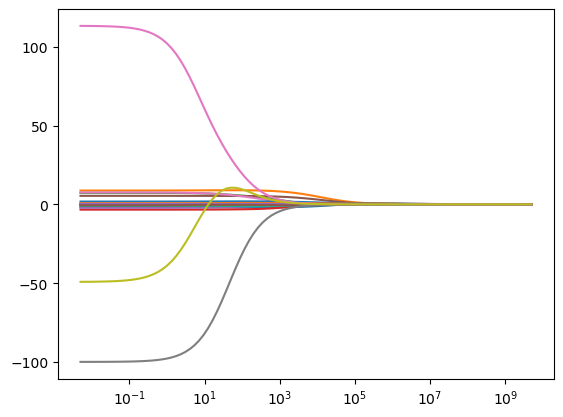

In [97]:
ax=plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

## Tahmin

In [107]:
ridge_model=Ridge().fit(X_train,y_train)

In [109]:
y_pred=ridge_model.predict(X_train)

In [111]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [117]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [119]:
RMSE=np.sqrt(mean_squared_error(y_train,y_pred))

In [121]:
RMSE

289.34470696006565

In [142]:
#cv ile elde edilmiş Rmse
from sklearn.model_selection import cross_val_score 
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train,y_train, cv=10, scoring="neg_mean_squared_error")))

351.3931585606319

In [144]:
#test hatası
y_pred=ridge_model.predict(X_test)

In [150]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.8082905730238

# Model Tunning (Model Optimizasyonu)

In [375]:
# Verilerinizi normalleştirin,normalize yeni sürümde kalmkmış
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [377]:
ridge_model=Ridge(alpha=1).fit(X_train_scaled,y_train)
y_pred=ridge_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

358.9753135890261

In [379]:
lambdalar= np.random.randint(0,1000,100)

In [381]:
lambdalar

array([651, 276, 960, 944, 698, 744, 610, 990,   7, 808, 849, 294, 375,
       721, 851, 180, 406, 726, 467, 157, 583, 420, 841, 410, 948, 380,
       519, 323, 462,  73, 351, 161,   7, 692, 713, 925, 865, 888, 566,
       453, 628, 727, 279, 130, 195, 246, 482, 299, 427, 965,  44, 756,
       202, 598, 179, 772, 972, 350, 435, 913, 584, 499, 799, 543, 708,
       933,  48, 797, 760, 437, 121, 598, 649, 430, 698, 977, 762, 698,
        87, 261, 535, 672, 691, 142, 728, 503, 750, 451,  60, 132, 190,
       424, 626, 123, 955,  54, 119, 996, 140, 340])

In [383]:
lambdalar2= 10**np.linspace(10,-2,100)*0.5

In [385]:
ridgecv=RidgeCV(alphas= lambdalar2,scoring="neg_mean_squared_error",cv=10)
ridgecv.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [386]:
ridgecv.alpha_

115.50648500415791

In [387]:
#final modeli

ridge_tuned=Ridge(alpha=ridgecv.alpha_).fit(X_train_scaled,y_train)

In [391]:
y_pred=ridge_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

386.09207550674677

# Lasso Regression
### Gerekli Kütüphaneler

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [22]:
df= pd.read_csv("C:/Users/beyra/Desktop/machine_learning/Hitters.csv")

In [43]:
df=df.dropna()

In [59]:
dms= pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)

X_train, X_test,  y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42) # x ve y sıraları önemli

In [61]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [63]:
df.shape

(263, 20)

In [65]:
lasso_model=Lasso().fit(X_train,y_train)

C:\Users\beyra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [67]:
lasso_model

Lasso()

In [69]:
lasso_model.intercept_

-5.5874506773361645

In [71]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

# farklı lambda değerlerine karılık katsayılar


In [96]:
 lasso = Lasso() # nesne oluştruud

coefs=[] 
#alphas=np.random.randint(0,100000,10)
alphas=10**np.linspace(10,-2,100)*0.5
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

C:\Users\beyra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\beyra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\beyra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e+03, toleranc

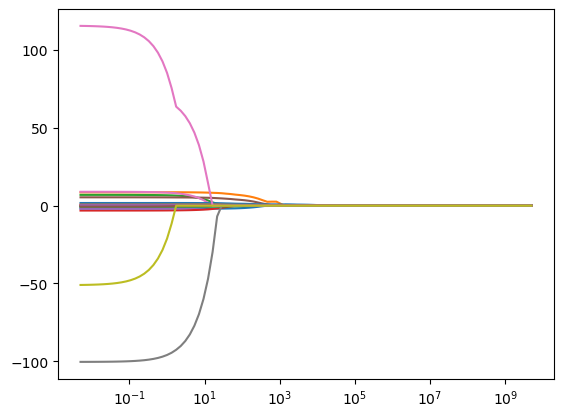

In [97]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")


# Tahmin

In [104]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [106]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [108]:
y_pred=lasso_model.predict(X_test)

In [110]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.09758845540347

In [112]:
r2_score(y_test,y_pred)

0.41422798132366134

## Model Tunning

In [140]:
lasso_cv_model=LassoCV(alphas=alphas,cv=10,max_iter=100000).fit(X_train,y_train)

In [141]:
lasso_cv_model.alpha_

201.85086292982749

In [142]:
lasso_tuned=Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [143]:
lasso_tuned=Lasso(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [144]:
y_pred=lasso_tuned.predict(X_test)

In [145]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.6832708037447

In [152]:
pd.Series(lasso_tuned.coef_,index=X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# ElasticNet Regresyon Modeli

In [157]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [161]:
df= pd.read_csv("C:/Users/beyra/Desktop/machine_learning/Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [163]:
enet_model=ElasticNet().fit(X_train,y_train)

C:\Users\beyra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [165]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [167]:
enet_model.intercept_


-6.465955602111762

In [169]:
# tahmin 
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [171]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [177]:
y_pred=enet_model.predict(X_test)

In [183]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.16765481812445

In [181]:
r2_score(y_test,y_pred)

0.4107022246932692

# Model Tunning

In [216]:
alphas=10**np.linspace(10,-2,100)*0.5


In [228]:
enet_cv_model= ElasticNetCV(alphas=alphas,cv=10).fit(X_train,y_train)

C:\Users\beyra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3249.948305884376, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\beyra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4337.003153540194, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\beyra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5751.424791645259, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\beyra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683:

In [229]:
enet_cv_model.alpha_

5748.784976988678

In [232]:
enet_cv_model.coef_


array([ 0.61111381,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11212622,  0.        ,
        0.25252702,  0.18656722,  0.00444355,  0.30988823,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [233]:
enet_cv_model.intercept_


-31.463121225640975

In [236]:
# final modeli

enet_tuned=ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train,y_train)

In [238]:
y_pred=enet_tuned.predict(X_test)

In [239]:
np.sqrt(mean_squared_error(y_test,y_pred))

393.9753065850553